# AUTHOR : Nidhi Bangera

# TASK 1 - Prediction using Supervised ML

## Predict the percentage of student based on the no. of hours of study

# Importing the required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Reading the dataset from url

In [2]:
url  ="http://bit.ly/w-data"
dataframe = pd.read_csv(url)

In [3]:
dataframe.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Analysing the Data

In [4]:
dataframe.shape

(25, 2)

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Correlation between variables

In [6]:
dataframe.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Scatter Plot for visualizing the data

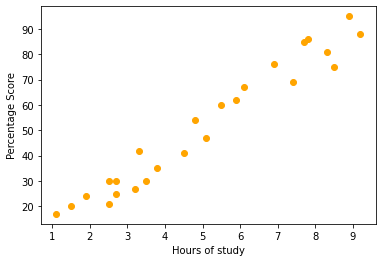

In [7]:
plt.scatter(dataframe['Hours'],dataframe['Scores'],c="orange")
plt.xlabel("Hours of study")
plt.ylabel("Percentage Score")
plt.show()

In [8]:
X =dataframe.iloc[:,:-1].values
y=dataframe.iloc[:,1].values

# Splitting the data into training and testing sets

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

# Applying Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
regressor = LinearRegression()

In [13]:
regressor.fit(X_train,y_train)

LinearRegression()

# Plotting the best fit line

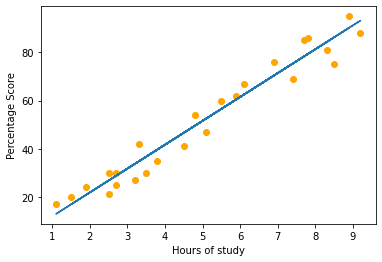

In [14]:
line = regressor.coef_*X + regressor.intercept_
plt.scatter(dataframe['Hours'],dataframe['Scores'],c="orange")
plt.xlabel("Hours of study")
plt.ylabel("Percentage Score")
plt.plot(X,line)
plt.show()

# Making Predictions

In [15]:
y_pred = regressor.predict(X_test)

# Comparing Actual and Predicted values

In [16]:
df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# What will be predicted score if a student studies for 9.25 hrs/ day?

In [19]:
hours=[[9.25]]
pred_score=regressor.predict(hours)
print("No of hours of study = 9.25")
print("Score = {}".format(str(pred_score)))

No of hours of study = 9.25
Score = [93.69173249]


# Calculating the performance metrics

# Mean absolute error

In [20]:
from sklearn.metrics import mean_absolute_error

In [21]:
print("Mean Absolute error",mean_absolute_error(y_test, y_pred))

Mean Absolute error 4.183859899002975


# R-Squared

In [22]:
from sklearn.metrics import r2_score

In [24]:
print("R-squared value",r2_score(y_test, y_pred))

R-square value 0.9454906892105355
